# Build Models

In this notebook, I will import the preprocessed data, one set with two principal components and the other unscaled, which I will use to create a pipeline consisting of scaling, PCA with four principal components, and GridSearchCV.

I will build models using logistic regression, KNN, and kernelized SVM.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import libraries for classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Import libraries for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Import models for pipelines
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [2]:
# Import preprocessed data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
X_train_2 = pd.read_csv('X_train_2.csv')
X_test_2 = pd.read_csv('X_test_2.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

## Logistic Regression

### Two Principal Components

In [3]:
# Define and fit logistic regression classifier
LR2 = LogisticRegression(C=5).fit(X_train_2, np.ravel(y_train))

In [4]:
# Predict values with logistic regression classifier
LR2_y_pred = LR2.predict(X_test_2)

In [5]:
# Print the logistic regression confusion matrix
print ('Logistic Regression Confusion Matrix\n')
print(confusion_matrix(y_test, LR2_y_pred))

Logistic Regression Confusion Matrix

[[20 10]
 [ 6 24]]


In [6]:
# Print the logistic regression classification report
print ('Logistic Regression Classification Report\n')
print(classification_report(y_test, LR2_y_pred))

Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.80      0.75        30

    accuracy                           0.73        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



For the decision boundary plots, I adapted code from https://favtutor.com/blogs/decision-boundary-logistic-regression

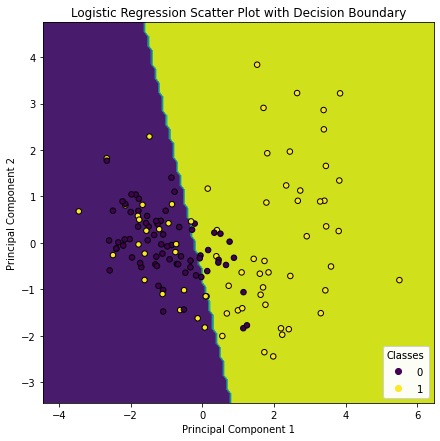

In [7]:
# Plot of decision boundary
# Define minimum and maximum x and y values
x_min, x_max = X_train_2.iloc[:, 0].min() - 1, X_train_2.iloc[:, 0].max() + 1
y_min, y_max = X_train_2.iloc[:, 1].min() - 1, X_train_2.iloc[:, 1].max() + 1

# Create grid of points
xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

# Define predictions
Z_train = LR2.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)

# Define figure content
fig, ax = plt.subplots(figsize=(7,7))
plt.contourf(xx_train, yy_train, Z_train)
scatter = ax.scatter(X_train_2.iloc[:, 0], X_train_2.iloc[:, 1], c = y_train.values, s = 30, edgecolor = 'k')

# Add legend
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
ax.add_artist(legend)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Scatter Plot with Decision Boundary')
plt.show()

### Four Principal Components

Now I will use the unscaled data to create a pipeline in which I will apply scaling, PCA with four principal components, and GridSearchCV to find the best parameters.

In [8]:
# Create logistic regression pipeline
LR_pipe = make_pipeline(StandardScaler(),
                     PCA(n_components=4),
                     LogisticRegression())

# Create parameter grid and run GridSearchCV
LR_param_grid = {'logisticregression__C': [1, 3, 5, 7, 9]} 
LR_grid = GridSearchCV(LR_pipe, param_grid=LR_param_grid)
LR_grid_fit = LR_grid.fit(X_train, np.ravel(y_train))

# Print best parameters
print(" Best parameters: {}". format(LR_grid.best_params_))

# Set best parameters
LR_pipe.set_params(**LR_grid_fit.best_params_)

# Fit model with best parameters
LR_pipe.fit(X_train, np.ravel(y_train))

# Make predictions
LR_pipe_pred = LR_pipe.predict(X_test)

 Best parameters: {'logisticregression__C': 7}


In [9]:
# Print the logistic regression confusion matrix
print ('Logistic Regression Confusion Matrix\n')
print(confusion_matrix(y_test, LR_pipe_pred))

Logistic Regression Confusion Matrix

[[25  5]
 [ 4 26]]


In [10]:
# Print the logistic regression classification report
print ('Logistic Regression Classification Report\n')
print(classification_report(y_test, LR_pipe_pred))

Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.85        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



As expected from the plot of cumulative expected variance in the Data Preprocessing notebook, using four principal components leads to higher accuracy scores.

## KNN

### Two Principal Components

In [11]:
# Define and fit the KNN classifier
KNN2 = KNeighborsClassifier(n_neighbors=4).fit(X_train_2, np.ravel(y_train))

In [12]:
# Predict values with KNN classifier
KNN2_y_pred = KNN2.predict(X_test_2)

In [13]:
# Print the KNN confusion matrix
print ('KNN Confusion Matrix\n')
print(confusion_matrix(y_test, KNN2_y_pred))

KNN Confusion Matrix

[[26  4]
 [10 20]]


In [14]:
# Print the KNN classification report
print ('KNN Classification Report\n')
print(classification_report(y_test, KNN2_y_pred))

KNN Classification Report

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.83      0.67      0.74        30

    accuracy                           0.77        60
   macro avg       0.78      0.77      0.76        60
weighted avg       0.78      0.77      0.76        60



For the decision boundary plots, I adapted code from https://favtutor.com/blogs/decision-boundary-logistic-regression

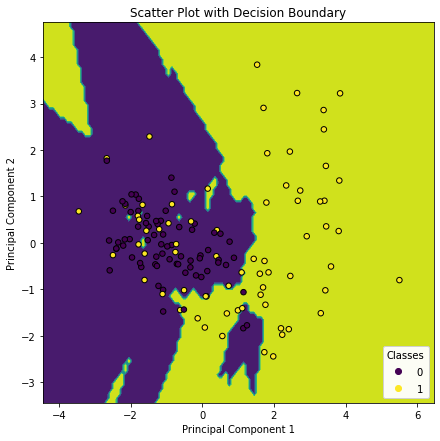

In [15]:
# Plot of decision boundary
# Define minimum and maximum x and y values
x_min, x_max = X_train_2.iloc[:, 0].min() - 1, X_train_2.iloc[:, 0].max() + 1
y_min, y_max = X_train_2.iloc[:, 1].min() - 1, X_train_2.iloc[:, 1].max() + 1

# Create grid of points
xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

# Define predictions
Z_train = KNN2.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)

# Define figure content
fig, ax = plt.subplots(figsize=(7,7))
plt.contourf(xx_train, yy_train, Z_train)
scatter = ax.scatter(X_train_2.iloc[:, 0], X_train_2.iloc[:, 1], c = y_train.values, s = 30, edgecolor = 'k')

# Add legend
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
ax.add_artist(legend)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Scatter Plot with Decision Boundary')
plt.show()

### Four Principal Components

Now I will use the unscaled data to create a pipeline in which I will apply scaling, PCA with four principal components, and GridSearchCV to find the best parameters.

In [16]:
# Create KNN pipeline
KNN_pipe = make_pipeline(StandardScaler(),
                     PCA(n_components=4),
                     KNeighborsClassifier())

# Create parameter grid and run GridSearchCV
KNN_param_grid = {'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6, 7]} 
KNN_grid = GridSearchCV(KNN_pipe, param_grid=KNN_param_grid)
KNN_grid_fit = KNN_grid.fit(X_train, np.ravel(y_train))

# Print best parameters
print(" Best parameters: {}". format(KNN_grid.best_params_))

# Set best parameters
KNN_pipe.set_params(**KNN_grid_fit.best_params_)

# Fit model with best parameters
KNN_pipe.fit(X_train, np.ravel(y_train))

# Make predictions
KNN_pipe_pred = KNN_pipe.predict(X_test)

 Best parameters: {'kneighborsclassifier__n_neighbors': 4}


In [17]:
# Print the KNN confusion matrix
print ('KNN Confusion Matrix\n')
print(confusion_matrix(y_test, KNN_pipe_pred))

KNN Confusion Matrix

[[25  5]
 [ 6 24]]


In [18]:
# Print the KNN classification report
print ('KNN Classification Report\n')
print(classification_report(y_test, KNN_pipe_pred))

KNN Classification Report

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.83      0.80      0.81        30

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



As with logistic regression, using four principal components improves the model's accuracy.

## Kernelized SVM

### Two Principal Components

In [19]:
# Define and fit the kernelized SVM classifier
SVC2 = SVC(kernel='rbf', C=1, gamma=0.01).fit(X_train_2, np.ravel(y_train))

In [20]:
# Predict values with kernelized SVM classifier
SVM2_y_pred = SVC2.predict(X_test_2)

In [21]:
# Print the kernelized SVM confusion matrix
print ('Kernelized SVM Confusion Matrix\n')
print(confusion_matrix(y_test, SVM2_y_pred))

Kernelized SVM Confusion Matrix

[[26  4]
 [ 8 22]]


In [22]:
# Print the kernelized SVM classification report
print ('Kernelized SVM Classification Report\n')
print(classification_report(y_test, SVM2_y_pred))

Kernelized SVM Classification Report

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.73      0.79        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



For the decision boundary plots, I adapted code from https://favtutor.com/blogs/decision-boundary-logistic-regression

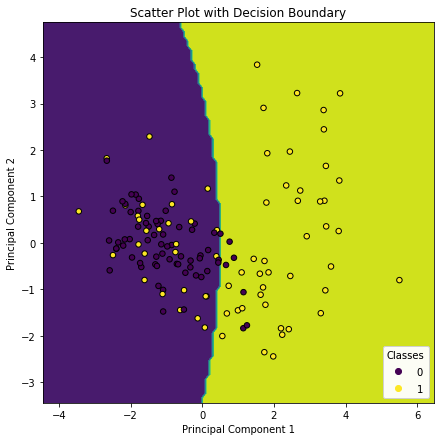

In [23]:
# Plot of decision boundary
# Define minimum and maximum x and y values
x_min, x_max = X_train_2.iloc[:, 0].min() - 1, X_train_2.iloc[:, 0].max() + 1
y_min, y_max = X_train_2.iloc[:, 1].min() - 1, X_train_2.iloc[:, 1].max() + 1

# Create grid of points
xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

# Define predictions
Z_train = SVC2.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)

# Define figure content
fig, ax = plt.subplots(figsize=(7,7))
plt.contourf(xx_train, yy_train, Z_train)
scatter = ax.scatter(X_train_2.iloc[:, 0], X_train_2.iloc[:, 1], c = y_train.values, s = 30, edgecolor = 'k')

# Add legend
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
ax.add_artist(legend)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Kernelized SVM Scatter Plot with Decision Boundary')
plt.show()

### Four Principal Components

Now I will use the unscaled data to create a pipeline in which I will apply scaling, PCA with four principal components, and GridSearchCV to find the best parameters.

In [24]:
# Create kernelized SVM pipeline
SVM_pipe = make_pipeline(StandardScaler(),
                     PCA(n_components=4),
                     SVC(kernel='rbf'))

# Create parameter grid and run GridSearchCV
SVM_param_grid = {'svc__C': [1, 3, 5, 7, 9], 
                  'svc__gamma': [0.001, 0.01, 0.05, 0.1, 1, 10]}
SVM_grid = GridSearchCV(SVM_pipe, param_grid=SVM_param_grid)
SVM_grid_fit = SVM_grid.fit(X_train, np.ravel(y_train))

# Print best parameters
print(" Best parameters: {}". format(SVM_grid.best_params_))

# Set best parameters
SVM_pipe.set_params(**SVM_grid_fit.best_params_)

# Fit model with best parameters
SVM_pipe.fit(X_train, np.ravel(y_train))

# Make predictions
SVM_pipe_pred = SVM_pipe.predict(X_test)

 Best parameters: {'svc__C': 1, 'svc__gamma': 0.01}


In [25]:
# Print the kernelized SVM confusion matrix
print ('Kernelized SVM Confusion Matrix\n')
print(confusion_matrix(y_test, SVM_pipe_pred))

Kernelized SVM Confusion Matrix

[[26  4]
 [ 7 23]]


In [26]:
# Print the kernelized SVM classification report
print ('Kernelized SVM Classification Report\n')
print(classification_report(y_test, SVM_pipe_pred))

Kernelized SVM Classification Report

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        30
           1       0.85      0.77      0.81        30

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



With two principal components, kernelized SVM performed a little better than KNN, which performed a little better than logistic regression.

With four principal components, logistic regression performed the best, with KNN and kernelized SVM performing similarly to one another.